In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
test = pd.read_csv('/content/drive/MyDrive/CSV And Excel file/prep0122020_test.csv')
train = pd.read_csv('/content/drive/MyDrive/CSV And Excel file/prep0122020_train.csv')

In [3]:
train.head()

,Unnamed: 0,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,2260,Developing,59.7,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,2126,Developed,73.1,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,839,Developing,56.1,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,2223,Developing,65.8,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,2723,Developing,54.9,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


In [4]:
train.head()

,Unnamed: 0,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,2260,Developing,59.7,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,2126,Developed,73.1,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,839,Developing,56.1,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,2223,Developing,65.8,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,2723,Developing,54.9,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


In [5]:
train.drop(['Unnamed: 0'],axis=1,inplace= True)
test.drop(['Unnamed: 0'],axis=1,inplace = True)

In [6]:
train.describe()

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000
mean,69.591950,158.400227,38.465363,1.830556,82.821429,82.986961,7566.863077,0.636998,12.204932
std,9.543473,123.394533,20.128002,5.400731,23.299777,22.942784,13997.967653,0.211018,3.303740
min,36.300000,1.000000,1.400000,0.100000,3.000000,3.000000,1.681350,0.000000,0.000000
25%,63.800000,69.000000,19.100000,0.100000,79.000000,79.000000,478.117925,0.501000,10.275000
50%,72.400000,137.000000,43.900000,0.100000,93.000000,93.000000,1937.707050,0.690000,12.500000
75%,76.000000,218.000000,56.300000,0.800000,97.000000,97.000000,6339.951305,0.789250,14.525000
max,89.000000,723.000000,77.600000,50.600000,99.000000,99.000000,119172.741800,0.945000,20.700000


In [7]:
train.shape ,test.shape

((1764, 10), (441, 10))

# Statastics,Preprocessing , EDA

In [8]:
## Convert status into bullion (0,1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train.Status=le.fit_transform(train.Status)
test.Status=le.fit_transform(test.Status)

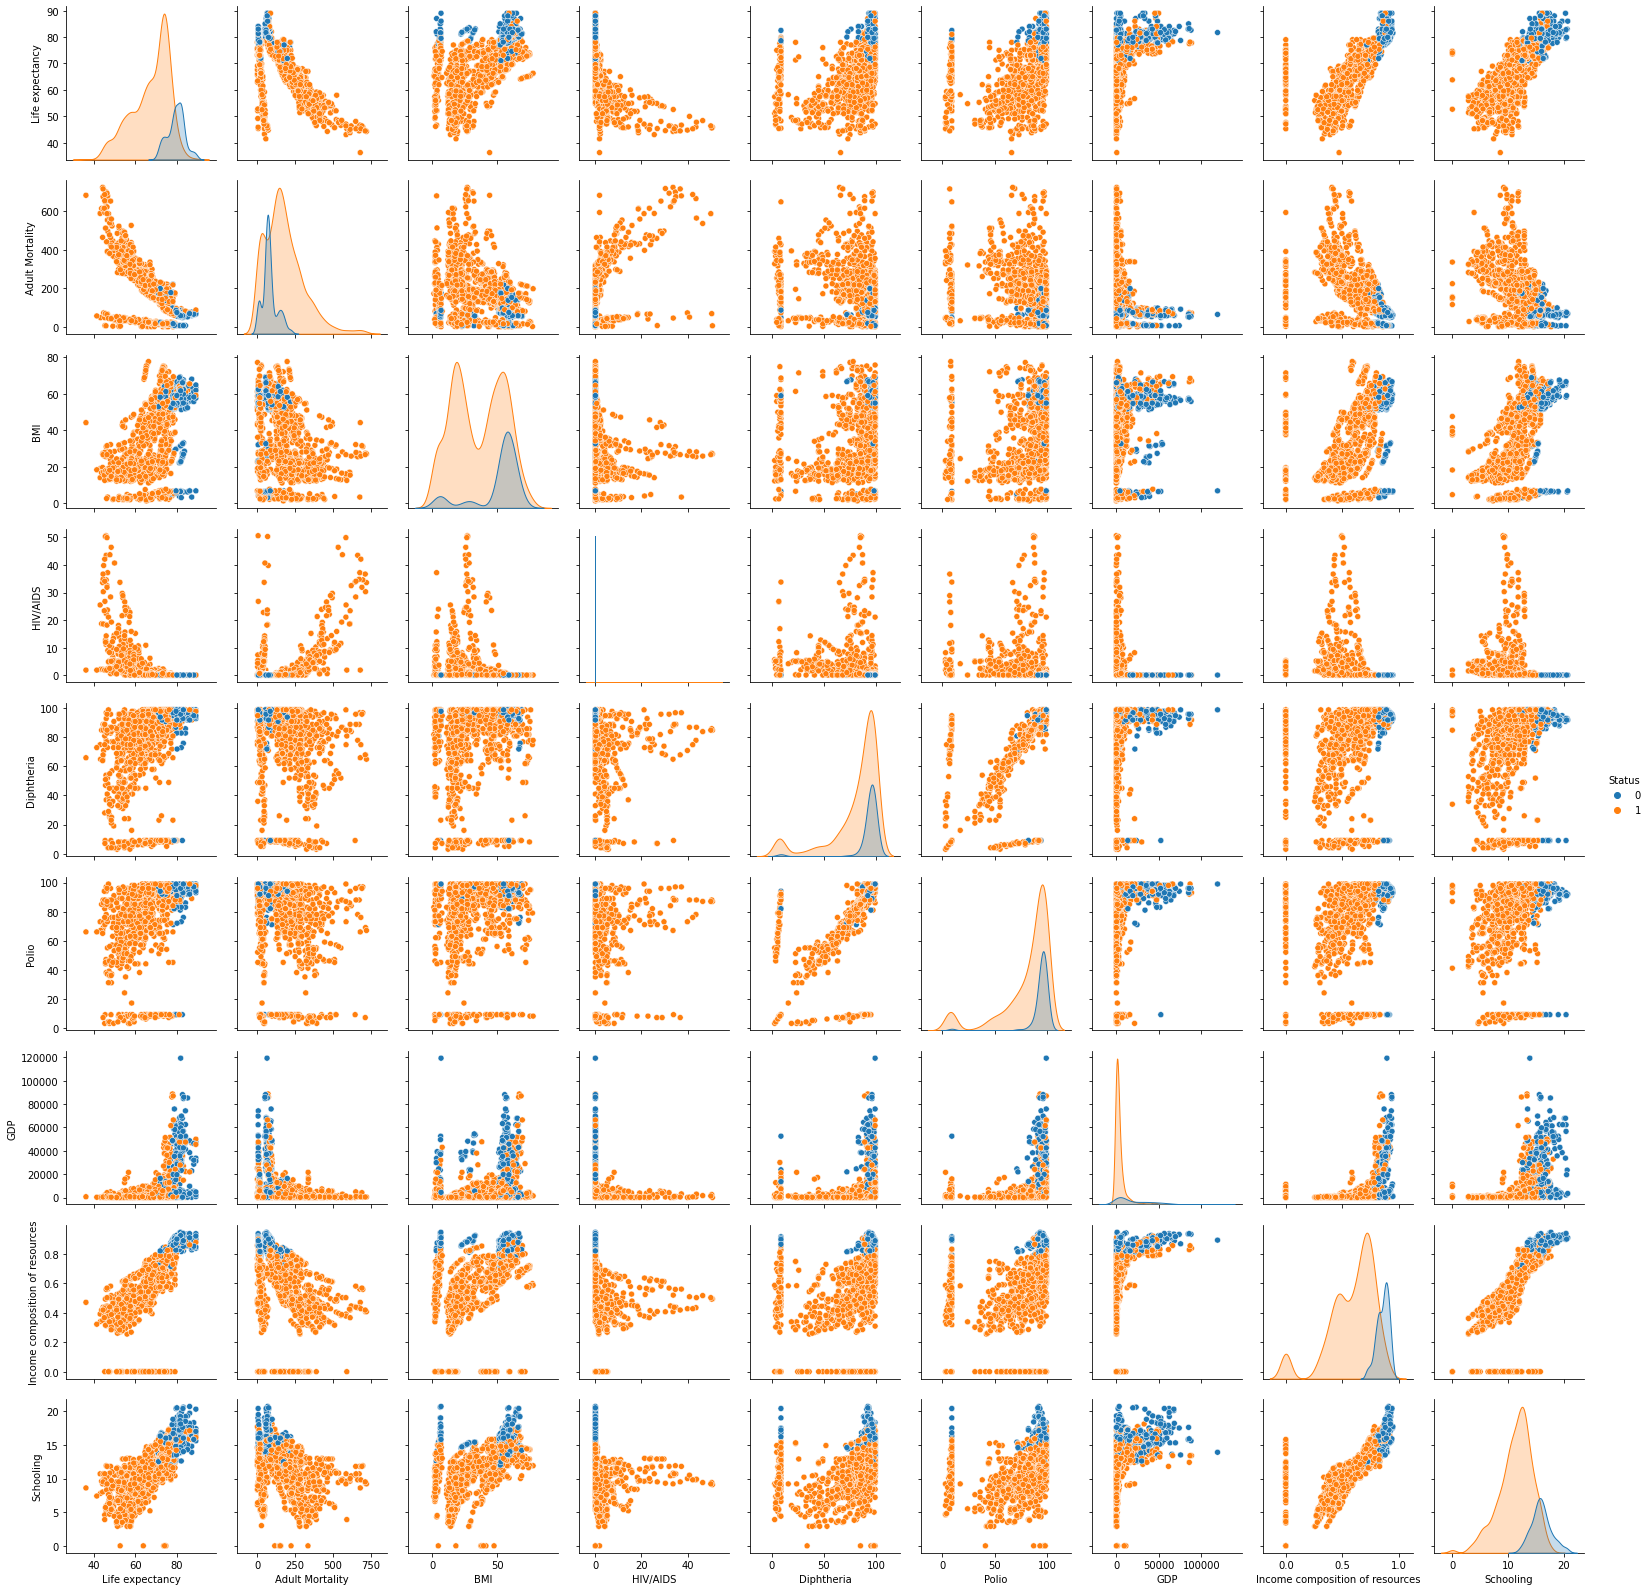

In [9]:
sns.pairplot(train,hue='Status')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1764 non-null   int64  
 1   Life expectancy                  1764 non-null   float64
 2   Adult Mortality                  1764 non-null   float64
 3   BMI                              1764 non-null   float64
 4   HIV/AIDS                         1764 non-null   float64
 5   Diphtheria                       1764 non-null   float64
 6   Polio                            1764 non-null   float64
 7   GDP                              1764 non-null   float64
 8   Income composition of resources  1764 non-null   float64
 9   Schooling                        1764 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 137.9 KB


In [11]:
train.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,59.7,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,0,73.1,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,1,56.1,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,1,65.8,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,1,54.9,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


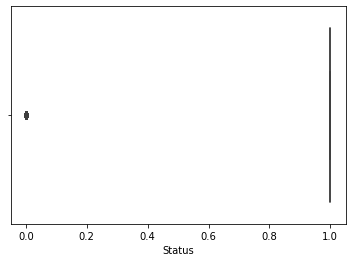

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


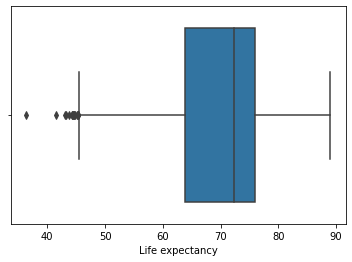

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


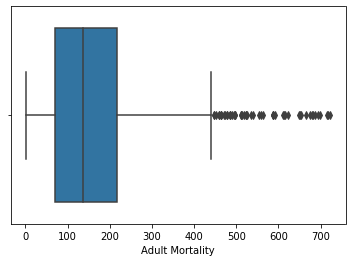

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


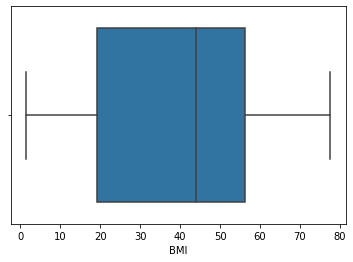

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


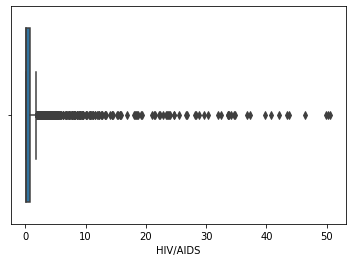

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


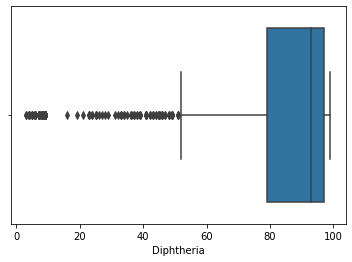

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


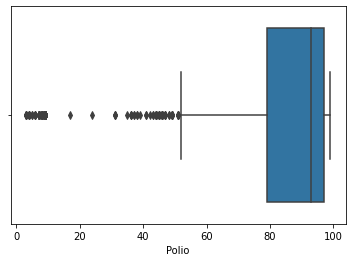

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


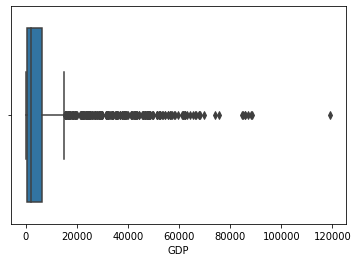

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


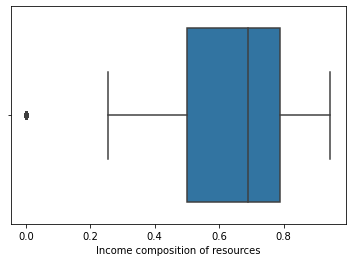

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


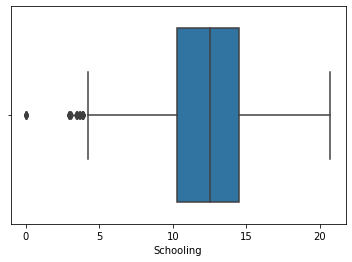

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
## Box Plot
def bx(dataframe):
    for i in dataframe.columns:
      
            sns.boxplot(dataframe[i])
            plt.show()
bx(train)

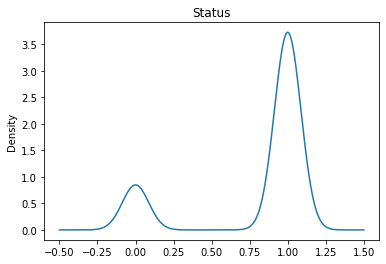

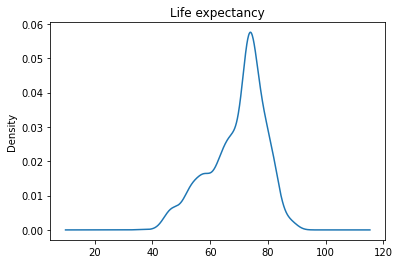

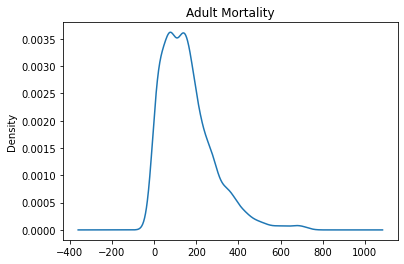

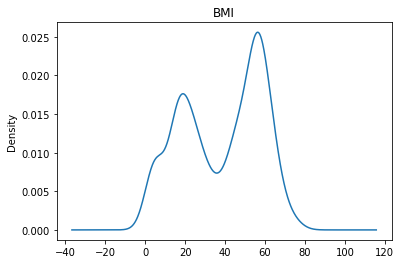

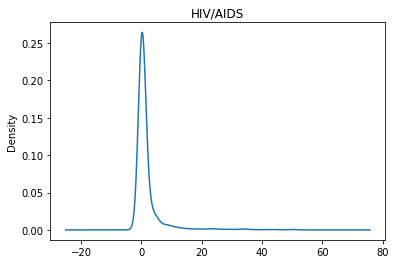

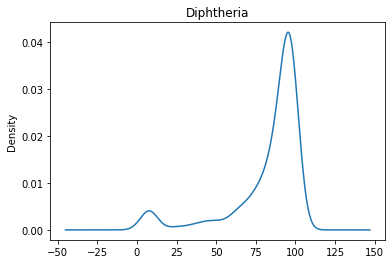

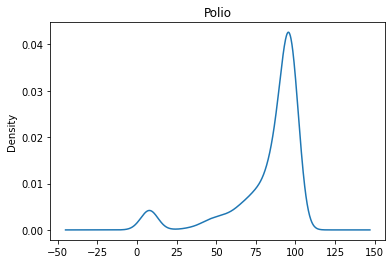

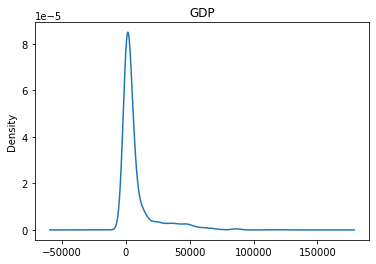

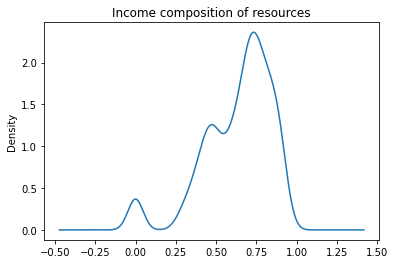

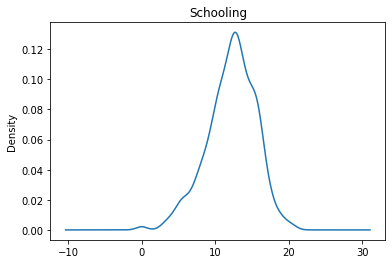

In [13]:
for i in train.columns:
    
    train[i].plot.kde()
    plt.title(i)
    plt.show()

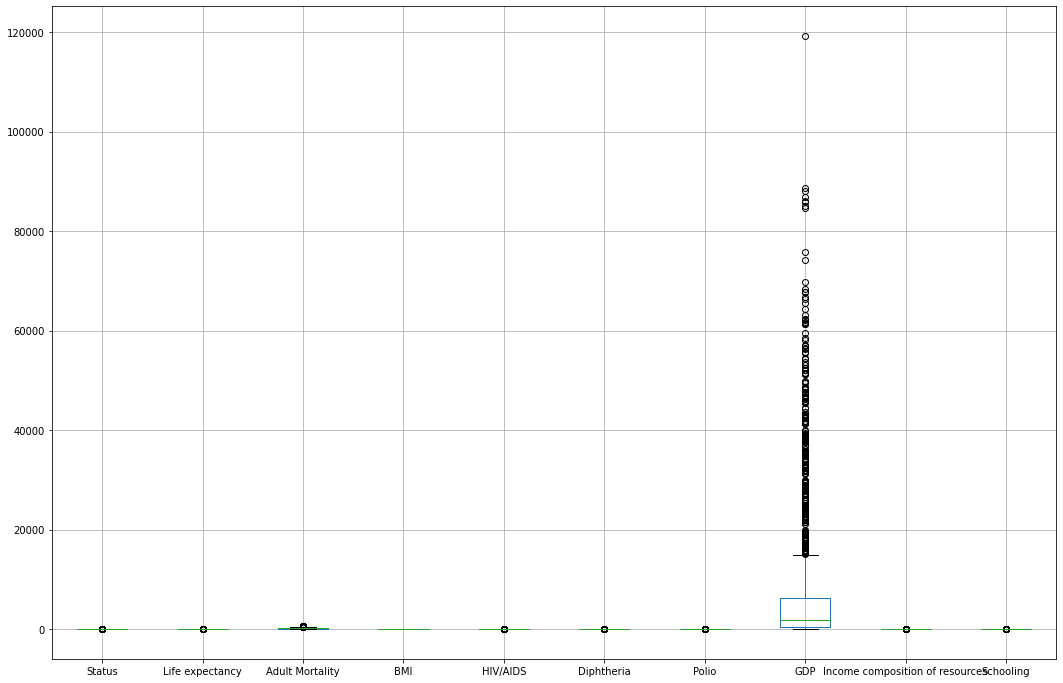

In [14]:
plt.figure(figsize=(18,12))
train.boxplot()

# Linear Regression

#### 1. How many independent variables/features are there in the data set?
Ans:- Status is our target variable and rest is feature.

###  2. How many numerical features are there?
Ans:- Total 9 Numerical Features. 


##  3. How many categorical features are there?
Ans;-  1 Feature. (Status)

## 4. Which is the third most important feature based on correlation for regression?

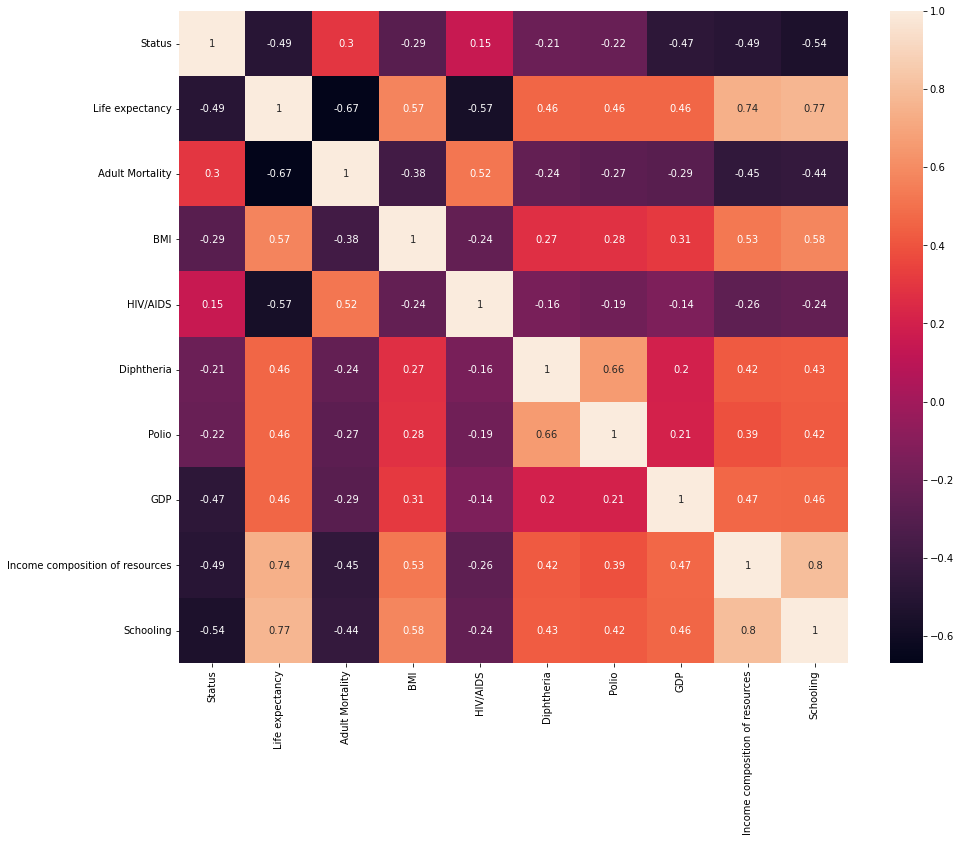

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(round(train.corr(),2),annot=True)

## 4- Ans From above graph we can Say (BMI,Income composition of resources Schooling) is the top 3 important feature.

### 5. Which is the least important feature based on correlation for regression?
 #### Ans- Adult Mortality,HIV/Aids,and Status

# Multiple Linear Regression:Convert Status into binary boolean variable which will be true if country is developed andanswer the following post multiple linear regression(Note: Take default parameters of sklearnmodule and answer the following):


### 1. What is mean_squared_error for the test dataset?


In [16]:
## Define x and y
x_lin_train=train.drop(['Life expectancy'],axis=1)
y_lin_train=train['Life expectancy']


In [17]:
x_lin_test=test.drop(['Life expectancy'],axis=1)
y_lin_test=test['Life expectancy']

In [18]:
x_lin_train.head()

,Status,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,0,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,1,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,1,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,1,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


In [19]:
y_lin_train.head()

0    59.7
1    73.1
2    56.1
3    65.8
4    54.9
Name: Life expectancy, dtype: float64

In [20]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()
lrr.fit(x_lin_train,y_lin_train)
print("Linear regression training score",lrr.score(x_lin_train,y_lin_train))
print("Linear refression testing score",lrr.score(x_lin_test,y_lin_test))


Linear regression training score 0.8293092777182385
Linear refression testing score 0.853898078946334


In [21]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score

In [22]:
y_lin_pred=lrr.predict(x_lin_test)

In [23]:
mean_squared_error(y_lin_test,y_lin_pred)

13.527166054723844

### 2. What is r2_score for the test dataset?

In [24]:
r2_score(y_lin_test,y_lin_pred)

0.853898078946334

### 3. What is the mean absolute error for the test dataset?


In [25]:
mean_absolute_error(y_lin_test,y_lin_pred)


2.7776030973284147

### 4. What is the value of cost function on the train and test dataset for the model previously trained?

In [26]:
Cost_Function = sum((y_lin_test-y_lin_pred)**2)/len(y_lin_test)
Cost_Function

13.527166054723855

## 5. What is mean_squared_error for the test dataset after we take top 5 features based on correlation?


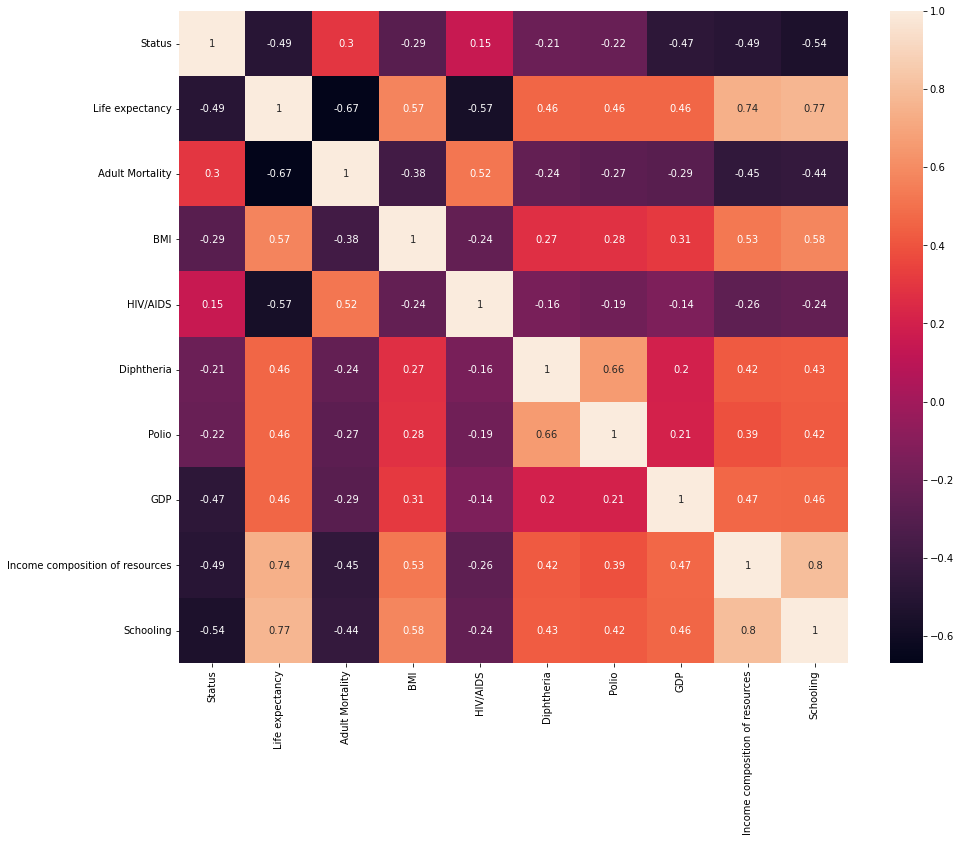

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(round(train.corr(),2),annot=True)

In [28]:
train.corr()['Life expectancy'].sort_values()

Adult Mortality                   -0.666727
HIV/AIDS                          -0.567904
Status                            -0.490577
Diphtheria                         0.461179
Polio                              0.461258
GDP                                0.463558
BMI                                0.572625
Income composition of resources    0.740394
Schooling                          0.768132
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
xx_train=train[['Schooling','Income composition of resources','BMI','GDP','Polio']]
yy_train=train['Life expectancy']

In [30]:
xx_test=test[['Schooling','Income composition of resources','BMI','GDP','Polio']]
yy_test=test['Life expectancy']

In [31]:
lr.fit(xx_train,yy_train)

LinearRegression()

In [32]:
lr.score(xx_train,yy_train)

0.6742972183759134

In [33]:
lr.score(xx_test,yy_test)

0.6997541015958079

In [34]:
yy_pred=lr.predict(xx_test)

In [35]:
r2_score(yy_test,yy_pred)

0.6997541015958079

In [36]:
mean_squared_error(yy_test,yy_pred)

27.79892348897586

In [37]:
mean_absolute_error(yy_test,yy_pred)

4.010441756372829

#### 6. What is r2_score for the test dataset after we take the top 5 features based on
correlation?
What is the predicted Life expectancy for the following countries?

####a. Case 1

i. Status=Developing

ii. Adult Mortality = 730

iii. BMI = 27

iv. HIV/AIDS = 33

v. Diphtheria=70

vi. Polio =60

vii. GDP=450

viii. Income composition of resources = 0.35

ix. Schooling=10


In [38]:
x_lin_test

,Status,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,19.0,27.0,0.1,97.0,99.0,16468.128860,0.819,13.4
1,0,92.0,55.0,0.1,93.0,93.0,48799.823700,0.897,16.6
2,1,288.0,22.5,6.0,8.0,78.0,544.222779,0.401,8.9
3,1,178.0,2.1,0.1,75.0,75.0,95.432793,0.505,6.7
4,1,32.0,24.0,4.4,2.0,24.0,192.597330,0.582,9.2
...,...,...,...,...,...,...,...,...,...
436,1,165.0,23.2,0.1,72.0,72.0,1261.289670,0.529,7.6
437,1,393.0,31.2,9.8,98.0,98.0,3598.759720,0.539,11.4
438,1,267.0,15.4,0.6,78.0,74.0,245.123588,0.466,8.7
439,1,394.0,16.1,4.9,28.0,38.0,81.683884,0.306,5.7


In [39]:
lrr.predict([[1,730,27,33,70,60,450,0.35,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([38.63978537])

#### b. Case 2

i. Status=Developed

ii. Adult Mortality = 100

iii. BMI = 20

iv. HIV/AIDS = 1

v. Diphtheria=7

vi. Polio =6

vii. GDP=4500

viii. Income composition of resources = 0.5

ix. Schooling=12



In [40]:
lrr.predict([[0,100,20,1,7,6,4500,0.5,12]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([65.63803673])

# Logistic regression:

###Convert Life expectancy into binary variable >=65 which is true if life expectancy is greaterthan or equal to 65 Take default parameters of Logistics regression in sklearn module


In [41]:
train.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,59.7,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,0,73.1,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,1,56.1,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,1,65.8,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,1,54.9,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


In [42]:
train['Life expectancy']=train['Life expectancy'].apply(lambda x: 1 if x>=65 else 0)

In [43]:
test['Life expectancy']=test['Life expectancy'].apply(lambda x: 1 if x>=65 else 0)

1. What is the accuracy of the logistic regression model on the test dataset?

2. Find the number of false positives & False negatives on the test data set.

3. Calculate the precision and recall on the test dataset.

4. What is the value of the cost function on the train and test dataset?

5. If we keep the threshold for positive class to be 70% then what is the accuracy of the
model on the test dataset?

In [44]:
x_log_train=train.drop(['Life expectancy'],axis=1)
y_log_train=train['Life expectancy']

In [45]:
x_log_test=test.drop(['Life expectancy'],axis=1)
y_log_test=test['Life expectancy']

In [46]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(x_log_train,y_log_train)
y_log_pred=log.predict(x_log_test)
r2_score(y_log_test,y_log_pred)

0.7567079592757913

In [47]:
log.score(x_log_train,y_log_train)

0.9478458049886621

In [48]:
log.score(x_log_test,y_log_test)

0.9501133786848073

In [49]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

In [50]:
confusion_matrix=confusion_matrix(y_log_test,y_log_pred)

In [51]:
from sklearn import metrics

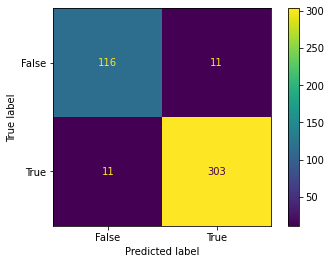

In [52]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_log_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       127
           1       0.96      0.96      0.96       314

    accuracy                           0.95       441
   macro avg       0.94      0.94      0.94       441
weighted avg       0.95      0.95      0.95       441



In [54]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_log_test,y_log_pred)

In [55]:
print(precision)

[0.71201814 0.96496815 1.        ]


In [56]:
print(recall)

[1.         0.96496815 0.        ]


In [57]:
thresholds

array([0, 1])

In [58]:
y_log_prob=log.predict(x_log_train)

In [59]:
from sklearn.metrics import log_loss
## What is the value of the cost function on the train and test dataset?

print('train cost function',log_loss(y_log_train,y_log_prob))
print('test cost function',log_loss(y_log_test,y_log_pred))


train cost function 1.8013665570255186
test cost function 1.7230428033101304


### If we keep the threshold for positive class to be 70% then what is the accuracy of the model on the test dataset?

In [60]:
clf = LogisticRegression(max_iter=500,class_weight="balanced")

clf.fit(x_log_train, y_log_train)

THRESHOLD = 0.7

predicted = clf.predict(x_log_test)

# print(clf.predict_proba(x_log_test)>THRESHOLD)

preds = np.where(clf.predict_proba(x_log_test)[:,1] > THRESHOLD,1,0)

Threshold_Data = pd.DataFrame(data=[accuracy_score(y_log_test, preds), recall_score(y_log_test, preds),precision_score(y_log_test, preds)]
             ,index=["accuracy", "recall", "precision"])

Regular_Data = pd.DataFrame(data=[accuracy_score(y_log_test, predicted), recall_score(y_log_test, predicted),precision_score(y_log_test, predicted)]
             ,index=["accuracy", "recall", "precision"])

In [61]:
Threshold_Data

,0
accuracy,0.918367
recall,0.891720
precision,0.992908


In [62]:
Regular_Data

,0
accuracy,0.936508
recall,0.926752
precision,0.983108


In [63]:
train.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,0,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,0,1,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,1,0,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,1,1,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,1,0,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


In [64]:
train.groupby(['Life expectancy']).count()

,Status,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
Life expectancy,,,,,,,,,
0,484,484,484,484,484,484,484,484,484
1,1280,1280,1280,1280,1280,1280,1280,1280,1280


In [65]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc_score(y_log_train,y_log_prob)

0.9293711260330578

In [66]:
roc_auc_score(y_log_test,y_log_pred)

0.9391769898189479

In [67]:
roc_curve(y_log_test,y_log_pred)

(array([0.        , 0.08661417, 1.        ]),
 array([0.        , 0.96496815, 1.        ]),
 array([2, 1, 0]))

In [68]:
 from sklearn.feature_selection import VarianceThreshold
 selector = VarianceThreshold(0.70)
xxx=selector.fit_transform(x_log_train)

In [69]:
log.fit(xxx,y_log_train)

LogisticRegression(max_iter=1000)

In [70]:
log.score(xxx,y_log_train)

0.9478458049886621

# Decision Tree:
 ## Convert Life expectancy into binary variable >=65 which is true if life expectancy is greaterthan or equal to 65 Take default parameters of Logistics regression in sklearn module


In [71]:
train.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,0,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,0,1,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,1,0,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,1,1,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,1,0,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


### 1 What is the accuracy of the Decision Tree model on the test dataset?

In [72]:
x_dec_train=train.drop(['Life expectancy'],axis=1)
y_dec_train=train['Life expectancy']

In [73]:
x_dec_test=test.drop(['Life expectancy'],axis=1)
y_dec_test=test['Life expectancy']

In [74]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [75]:
dec.fit(x_dec_train,y_dec_train)

DecisionTreeClassifier()

In [76]:
print("train score",dec.score(x_dec_train,y_dec_train))

train score 1.0


In [77]:
print("testing score",dec.score(x_dec_test,y_dec_test))

testing score 0.9501133786848073


In [78]:
y_dec_pred=dec.predict(x_dec_test)

In [79]:
accuracy_score(y_dec_test,y_dec_pred)

0.9501133786848073

## 2 Find the number of false positives & False negatives on the test data set.


In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix_dec=confusion_matrix(y_dec_test,y_dec_pred)
confusion_matrix_dec

array([[115,  12],
       [ 10, 304]])

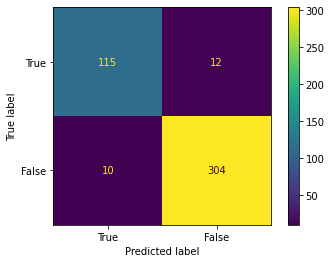

In [82]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dec, display_labels = [True,False])
cm_display.plot()
plt.show()

###  Calculate the precision and recall on the test dataset.

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_dec_test,y_dec_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       127
           1       0.96      0.97      0.97       314

    accuracy                           0.95       441
   macro avg       0.94      0.94      0.94       441
weighted avg       0.95      0.95      0.95       441



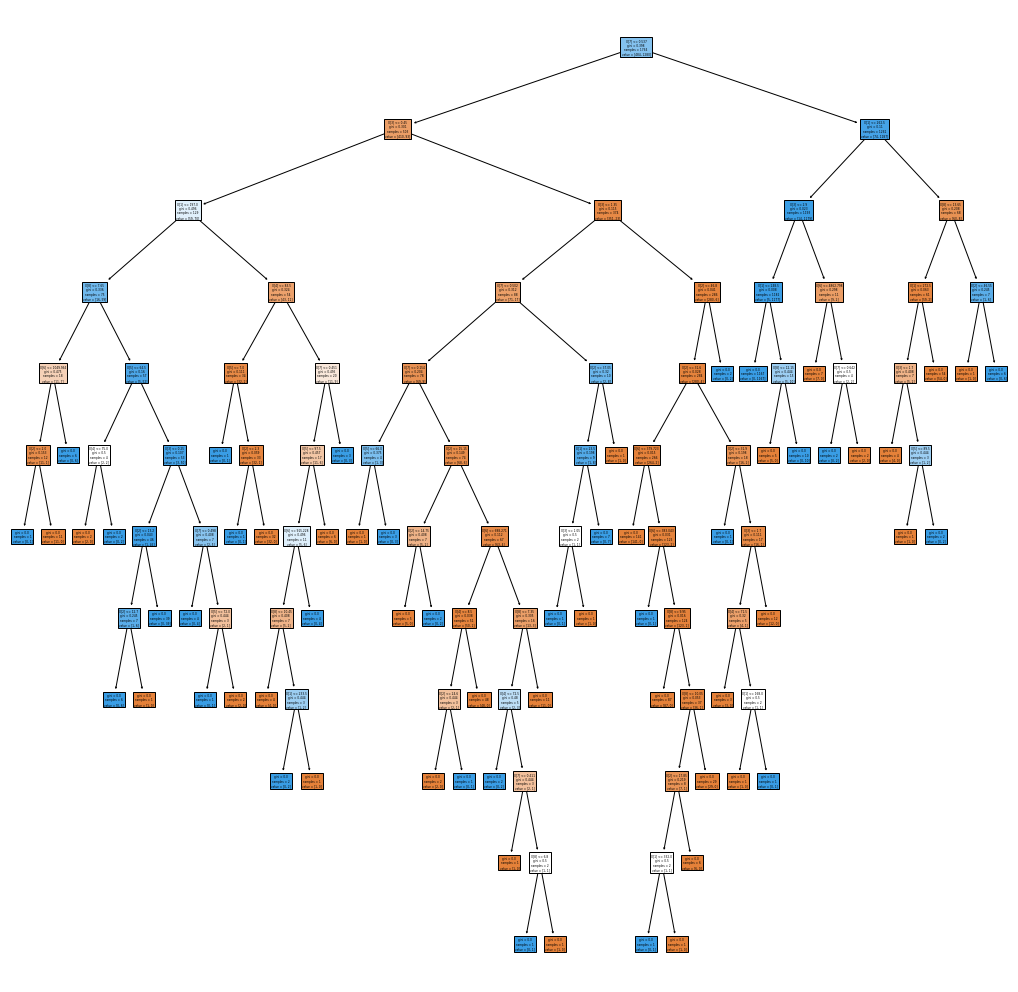

In [84]:
from sklearn import tree
plt.figure(figsize=(18,18))
tree.plot_tree(dec,filled=True)
plt.show()

In [85]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_dec_test,y_dec_pred)

In [86]:
print('precision:-',precision)
print('recall:-', recall)

precision:- [0.71201814 0.96202532 1.        ]
recall:- [1.         0.96815287 0.        ]


### Model is Outerfit , so we do Hyper perameter tuning.

In [87]:
### Model is Outerfit , so we do Hyper perameter tuning.

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gscv = GridSearchCV(estimator=clf,param_grid=params,cv=10)
gscv.fit(x_dec_train,y_dec_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [88]:
model = gscv.best_estimator_
model.fit(x_dec_train,y_dec_train)
y_train_pred_gscv = model.predict(x_dec_train)
y_test_pred_gscv = model.predict(x_dec_test)

print(f'Train score {accuracy_score(y_train_pred_gscv,y_dec_train)}')
print(f'Test score {accuracy_score(y_test_pred_gscv,y_dec_test)}')


Train score 0.9863945578231292
Test score 0.9546485260770975


In [89]:
gscv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}

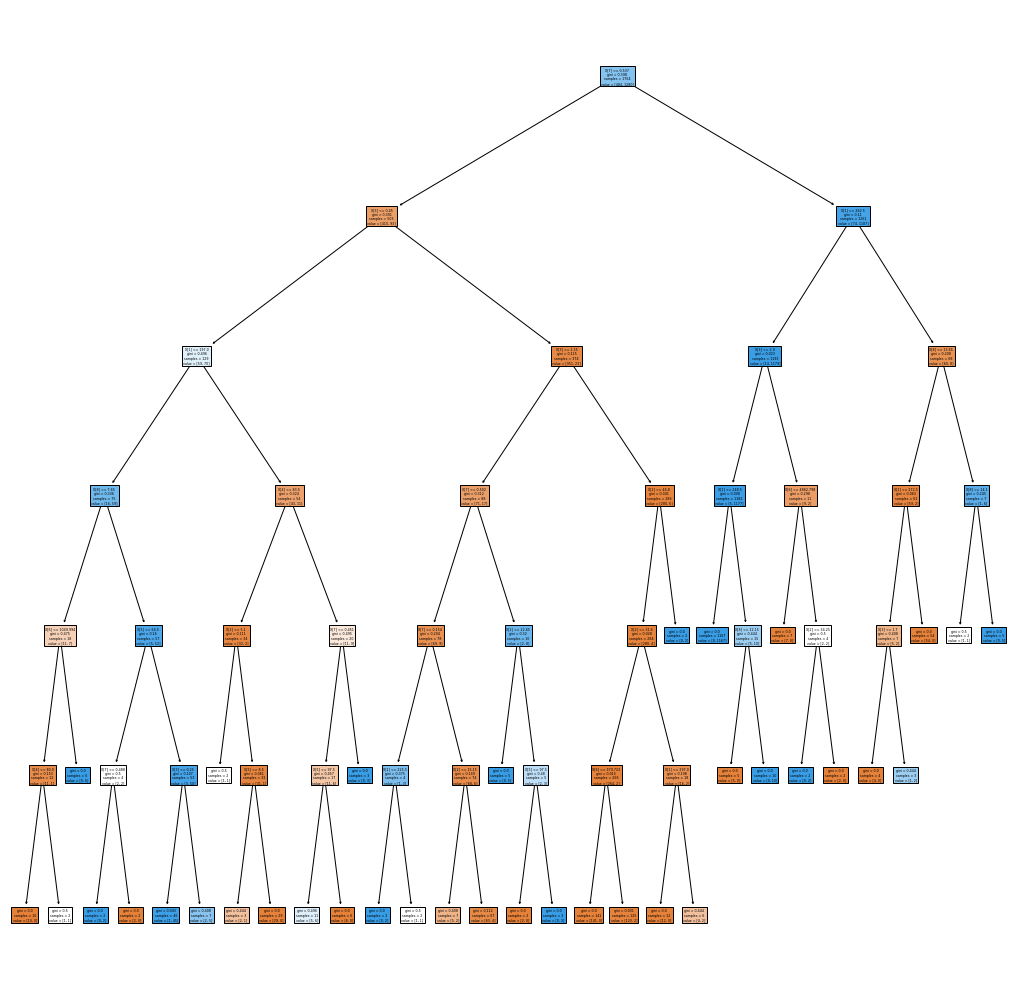

In [90]:
from sklearn import tree
plt.figure(figsize=(18,18))
tree.plot_tree(model,filled=True)
plt.show()

In [91]:
confusion_matrix_dec_gscv=confusion_matrix(y_dec_test,y_test_pred_gscv)
confusion_matrix_dec_gscv

array([[119,   8],
       [ 12, 302]])

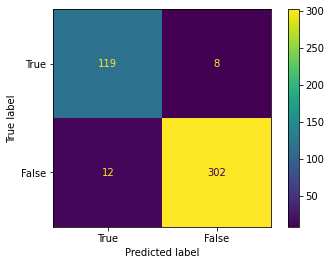

In [92]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dec_gscv, display_labels = [True,False])
cm_display.plot()
plt.show()

In [93]:
from sklearn.model_selection import cross_val_score
print("cross_val_score",np.mean(cross_val_score(gscv,x_dec_train,y_dec_train,scoring='accuracy',cv=10))*100)


cross_val_score 96.486260914227


In [94]:
print("cross_val_score",np.mean(cross_val_score(gscv,x_dec_test,y_dec_test,scoring='accuracy',cv=10))*100)

cross_val_score 94.09595959595958


### 4 What is the Gini Impurity of the train dataset?

In [95]:
x_dec_train

,Status,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,0,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,1,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,1,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,1,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6
...,...,...,...,...,...,...,...,...,...
1759,1,187.0,22.9,0.3,81.0,82.0,3113.486350,0.656,12.1
1760,1,16.0,54.7,0.7,84.0,84.0,5759.643000,0.703,13.0
1761,1,369.0,27.2,4.6,85.0,85.0,1255.648189,0.496,10.4
1762,1,325.0,28.2,4.1,46.0,46.0,768.176767,0.361,2.9


# Random Forest:

Convert Life expectancy into binary variable >=65 which is true if life expectancy is greater
than or equal to 65
Take default parameters of Logistics regression in sklearn module


In [96]:
train.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,0,247.0,19.1,0.7,87.0,87.0,733.581811,0.408,6.2
1,0,1,159.0,55.6,0.1,96.0,95.0,1136.473560,0.780,14.7
2,1,0,339.0,22.1,7.2,44.0,59.0,17136.445680,0.589,9.2
3,1,1,21.0,26.2,0.9,98.0,99.0,199.571460,0.533,10.1
4,1,0,41.0,14.8,8.6,64.0,62.0,336.459392,0.434,10.6


In [97]:
test.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,1,19.0,27.0,0.1,97.0,99.0,16468.128860,0.819,13.4
1,0,1,92.0,55.0,0.1,93.0,93.0,48799.823700,0.897,16.6
2,1,0,288.0,22.5,6.0,8.0,78.0,544.222779,0.401,8.9
3,1,0,178.0,2.1,0.1,75.0,75.0,95.432793,0.505,6.7
4,1,0,32.0,24.0,4.4,2.0,24.0,192.597330,0.582,9.2


#### 1 What is the accuracy of the model on the test dataset?

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
x_rend_train=train.drop(['Life expectancy'],axis=1)
y_rend_train=train['Life expectancy']

In [100]:
x_rend_test=test.drop(['Life expectancy'],axis=1)
y_rend_test=test['Life expectancy']

In [101]:
rend=RandomForestClassifier()
rend.fit(x_rend_train,y_rend_train)
y_pred=rend.predict(x_rend_test)
print(rend.score(x_rend_train,y_rend_train))
print(rend.score(x_rend_test,y_rend_test))


1.0
0.9750566893424036


### Model is Outerfit , so we do Hyper perameter tuning.

In [102]:
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [103]:
cvr=GridSearchCV(rend,param_grid=param_grid,cv=5)
cvr.fit(x_rend_train,y_rend_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [104]:
cvr.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [105]:
rend1=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=100)
rend1.fit(x_rend_train,y_rend_train)
y_rend_pred=rend1.predict(x_rend_test)
print('Train', rend1.score(x_rend_train,y_rend_train))
print('test',  rend1.score(x_rend_test,y_rend_test))


Train 0.9971655328798186
test 0.9750566893424036


#### 2 Find the number of false positives & False negatives on the test data set.

In [106]:
confusion_matrix_rend=confusion_matrix(y_dec_test,y_rend_pred)
confusion_matrix_rend

array([[122,   5],
       [  6, 308]])

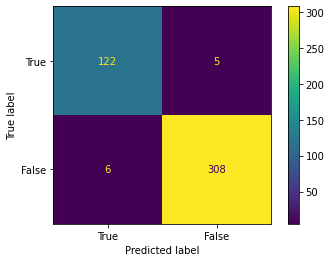

In [107]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rend, display_labels = [True, False])
cm_display.plot()
plt.show()

In [108]:
tp, fn, fp, tn = confusion_matrix(y_dec_test,y_rend_pred).ravel()
print('False Positive',fp)
print('False Negative',fn)


False Positive 6
False Negative 5


### 3 Calculate the precision and recall on the test dataset.

In [109]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_dec_test,y_rend_pred)

(array([0.953125  , 0.98402556]),
 array([0.96062992, 0.98089172]),
 array([0.95686275, 0.98245614]),
 array([127, 314]))

In [110]:
print(classification_report(y_dec_test,y_rend_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       127
           1       0.98      0.98      0.98       314

    accuracy                           0.98       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.98      0.98      0.98       441



In [111]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_dec_test,y_rend_pred)

In [112]:
print(precision)

[0.71201814 0.98402556 1.        ]


In [113]:
print(recall)

[1.         0.98089172 0.        ]
